### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

### READ CSV FILE

In [4]:
#read csv files
df=pd.read_csv('onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
 df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [7]:
df.shape

(6362620, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [10]:
# no null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
print(correlation)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   

                oldbalanceDest  newbalanceDest   isFraud  
step                  0.027665        0.025888  0.031578  
amount                0.294137        0.459304  0.076688  
oldbalanceOrg         0.066243        0.042029  0.010154  
newbalanceOrig        0.067812        0.041837 -0.008148  
oldbalanceDest        1.000000        0.976569 -0.005885  
newbalanceDest        0.976569        1.000000  0.000535  
isFraud              -0.005885    

## DATA VISUALIZATION

<Axes: xlabel='type', ylabel='count'>

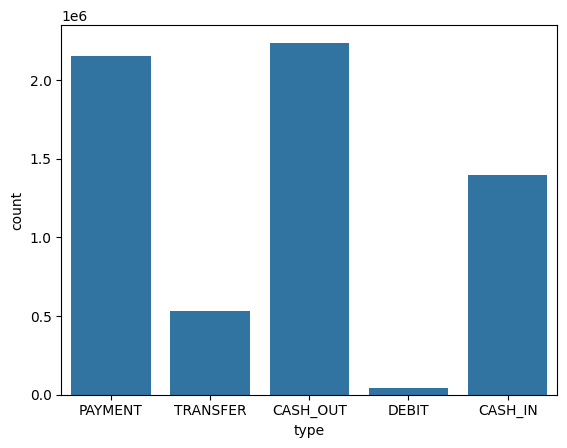

In [12]:
sns.countplot(x='type',data=df)

<Axes: xlabel='type', ylabel='amount'>

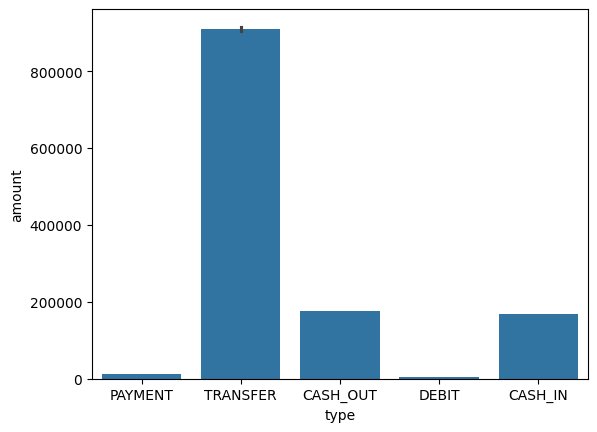

In [13]:
sns.barplot(x='type', y='amount', data=df)

In [14]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
df.loc[df["isFraud"]==1,"isFraud"]= "Fraud"
df.loc[df["isFraud"]==0,"isFraud"]= "Not Fraud"
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Not Fraud


<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

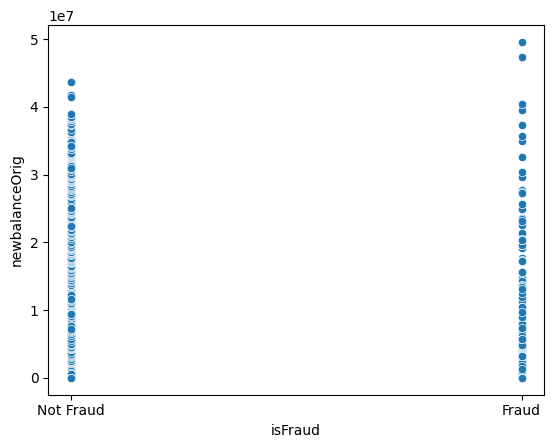

In [16]:
sns.scatterplot(x='isFraud',y='newbalanceOrig',data=df)

<Axes: xlabel='amount', ylabel='oldbalanceOrg'>

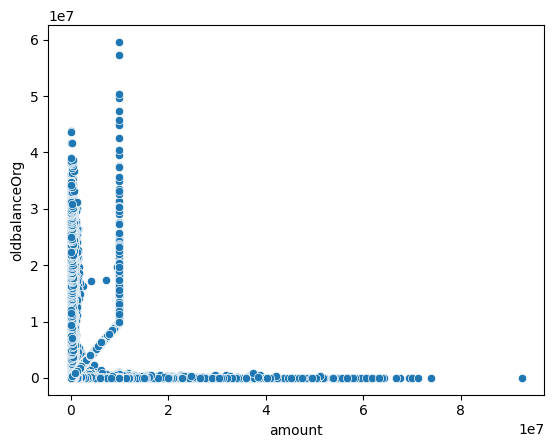

In [17]:
sns.scatterplot(x='amount',y='oldbalanceOrg',data=df)

<Axes: >

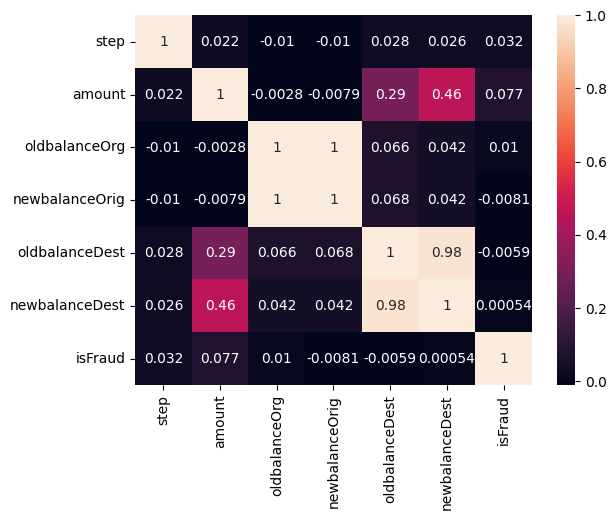

In [18]:
sns.heatmap(correlation,annot=True)

### DATA PREPROCESSING

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [20]:
df.drop(['nameDest','nameOrig'],axis=1,inplace=True)

In [21]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,Not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,Not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,Not Fraud


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,Not Fraud
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,Not Fraud
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,Not Fraud


In [24]:
df["type"].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [25]:
#dividing the dataset into dependent and independent y and x respectively
x=df.drop(["isFraud"],axis=1)
y=df["isFraud"]

In [26]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [27]:
y.head()

0    Not Fraud
1    Not Fraud
2        Fraud
3        Fraud
4    Not Fraud
Name: isFraud, dtype: object

### TRAIN TEST SPLIT

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
#for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

### MODEL BUILDING

#### 1. LOGISTIC REGRESSION

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
lr.score(x_test,y_test)

0.9990947125555196

#### 2. Decision Tree Classifier

In [32]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dt.score(x_test,y_test)

0.999718669353191

#### 3. Random Forest Classifier

In [36]:
rfc=RandomForestClassifier(n_estimators=30, criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [37]:
rfc.score(x_test,y_test)

0.9997359578286932

### MODEL ACCURACY

In [38]:
print("Logistic Regression :",lr.score(x_test,y_test) *100)
print("Decision Tree Classifier :",dt.score(x_test,y_test) *100)
print("Random Forest Classifier :",rfc.score(x_test,y_test) *100)

Logistic Regression : 99.90947125555196
Decision Tree Classifier : 99.9718669353191
Random Forest Classifier : 99.97359578286932


In [39]:
dt.predict(x_test)

array(['Not Fraud', 'Not Fraud', 'Not Fraud', ..., 'Not Fraud',
       'Not Fraud', 'Not Fraud'], dtype=object)

### PREDICTION

In [40]:
features=np.array([[696,1,85002.52,85002.52,0,169,50]])
dt.predict(features)

array(['Fraud'], dtype=object)

### SAVING THE MODEL

In [41]:
pickle.dump(rfc,open('model.sav','wb'))

In [42]:
# loading the saved model
loaded_model = pickle.load(open('model.sav', 'rb'))